In [105]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss

import operator

%matplotlib inline

## Objectives

* Exploratory Data Analysis
* How to deal with data that has anonymous features

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [3]:
train.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,0.366667,0.611765,0.05,0,0.110435,0.803973,0.106075,0.473965,0.835617,0.106452,...,1,1,1,1,0,1,0,0,1,0
1,0.100000,0.758175,0.30,0,0.180128,0.621378,0.287144,0.503919,0.674919,0.403616,...,0,0,0,0,0,0,0,0,0,0
2,0.100000,0.658812,0.10,0,0.243421,0.640959,0.312765,0.279784,0.686775,0.280301,...,0,0,0,0,0,0,0,0,0,0
3,0.100000,0.655752,0.10,0,0.226978,0.776996,0.150657,0.336948,0.802121,0.125608,...,0,0,0,0,0,0,0,0,0,0
4,0.000000,0.484851,0.00,0,0.561200,0.771463,0.244287,0.293096,0.717575,0.230842,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.columns

Index([u'Activity', u'D1', u'D2', u'D3', u'D4', u'D5', u'D6', u'D7', u'D8',
       u'D9',
       ...
       u'D1767', u'D1768', u'D1769', u'D1770', u'D1771', u'D1772', u'D1773',
       u'D1774', u'D1775', u'D1776'],
      dtype='object', length=1777)

In [6]:
train.Activity.value_counts()

1    2034
0    1717
Name: Activity, dtype: int64

** Balanced Dataset **

In [7]:
assert train.isnull().sum().sum() == 0, 'There are some missing values in the dataset'

In [8]:
assert test.isnull().sum().sum() == 0, 'There are some missing values in the dataset'

## Correlation with Target Variable

In [13]:
def get_pearson_score(target, feature_name):
    return np.corrcoef(train[target], train[feature_name])[0][1]

def get_correlation_scores(df):
    if 'Activity' not in df.columns:
        raise ValueError('Target Variable is missing in the dataset')
    
    correlation_map = {}
    
    for feat in df.columns:
        correlation_map[('Activity', feat)] = get_pearson_score('Activity', feat)
    
    return correlation_map

In [14]:
correlation_map = get_correlation_scores(train)

In [24]:
def get_highly_correlated_features(correlation_map, threshold=0.3):
    highly_correlated_features = []
    
    for key, value in correlation_map.iteritems():
        if abs(value) >= threshold:
            if key[0] != key[1]: # Avoid pairs like ( 'Activity', 'Activity' )
                highly_correlated_features.append(key)
    
    return highly_correlated_features

In [25]:
highly_correlated_features = get_highly_correlated_features(correlation_map)

In [32]:
def analyze_different_thresholds( correlation_map ):
    thresholds = np.linspace(0.2, 0.4, 10)
    
    for threshold in thresholds:
        print 'Threshold %f -> \nFeature Pairs %s \n' %(threshold, get_highly_correlated_features(correlation_map, threshold)) 

In [33]:
analyze_different_thresholds( correlation_map )

Threshold 0.200000 -> 
Feature Pairs [('Activity', 'D146'), ('Activity', 'D659'), ('Activity', 'D607'), ('Activity', 'D209'), ('Activity', 'D596'), ('Activity', 'D87'), ('Activity', 'D27'), ('Activity', 'D217'), ('Activity', 'D469'), ('Activity', 'D660'), ('Activity', 'D182'), ('Activity', 'D747')] 

Threshold 0.222222 -> 
Feature Pairs [('Activity', 'D659'), ('Activity', 'D87'), ('Activity', 'D27'), ('Activity', 'D217'), ('Activity', 'D469'), ('Activity', 'D182'), ('Activity', 'D747')] 

Threshold 0.244444 -> 
Feature Pairs [('Activity', 'D27'), ('Activity', 'D469')] 

Threshold 0.266667 -> 
Feature Pairs [('Activity', 'D27'), ('Activity', 'D469')] 

Threshold 0.288889 -> 
Feature Pairs [('Activity', 'D27')] 

Threshold 0.311111 -> 
Feature Pairs [('Activity', 'D27')] 

Threshold 0.333333 -> 
Feature Pairs [('Activity', 'D27')] 

Threshold 0.355556 -> 
Feature Pairs [('Activity', 'D27')] 

Threshold 0.377778 -> 
Feature Pairs [('Activity', 'D27')] 

Threshold 0.400000 -> 
Feature Pair

## Visualize Mean by Category

In [34]:
train_neg_target = train[train.Activity == 0]
train_pos_target = train[train.Activity == 1]

In [37]:
features = train.columns[1:] # Omitting Activity variable
train_neg_target_mean = train_neg_target[features].mean()
train_pos_target_mean = train_pos_target[features].mean()

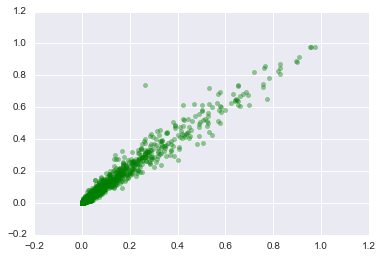

In [38]:
plt.scatter(train_neg_target_mean, train_pos_target_mean, color='g', alpha=0.4);

In [45]:
mask = (train_neg_target_mean > 0.2) & ( train_neg_target_mean < 0.3)
df1 = train_neg_target_mean[mask]

mask = ( train_pos_target_mean > 0.7) & ( train_pos_target_mean < 0.8)
df2 = train_pos_target_mean[mask]

print 'Common column %s' %(set(df1.index.values).intersection(df2.index.values))

Common column set(['D27'])


## Visualize standard deviation by category

In [46]:
train_neg_target_std = train_neg_target[features].std()
train_pos_target_std = train_pos_target[features].std()

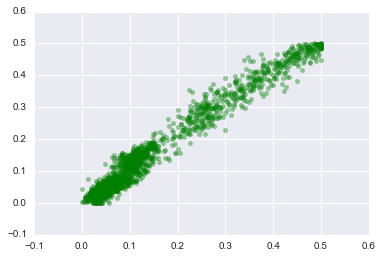

In [47]:
plt.scatter(train_neg_target_std, train_pos_target_std, color='g', alpha=0.4);

## Visualize standard deviation at a glance

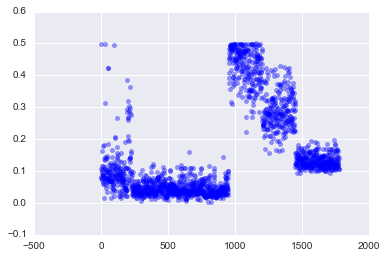

In [48]:
plt.scatter(np.arange(len(train.columns)), train.std(), color='b', alpha=0.4);

## Visualize mean at a glance

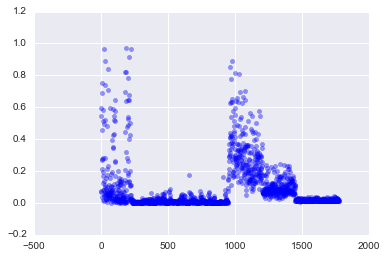

In [49]:
plt.scatter(np.arange(len(train.columns)), train.mean(), color='b', alpha=0.4);

## Visualizing Max values at a glance

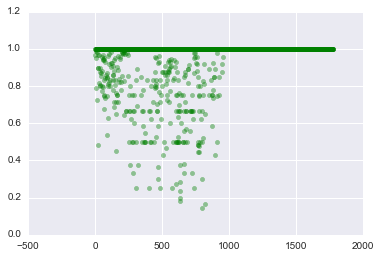

In [59]:
plt.scatter(np.arange(len(train.columns)), train.max(), color='g', alpha=0.4);

## Visualizing mode of different features at a glance

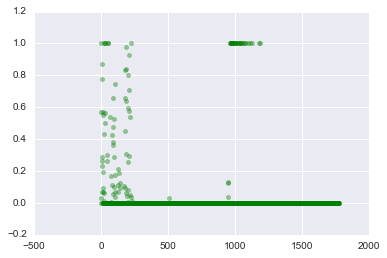

In [64]:
plt.scatter(np.arange(len(train.columns)), train.mode().ix[0], color='g', alpha=0.4);

## Random Forest Feature Importance

In [51]:
X = train[train.columns[1:]]
y = train.Activity

In [52]:
assert X.shape[1] == 1776, 'Mismatch in number of features'

In [53]:
rf = RandomForestClassifier()
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

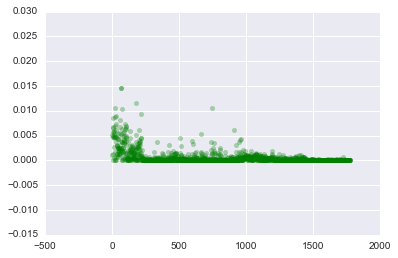

In [54]:
plt.scatter(np.arange(X.shape[1]), rf.feature_importances_, color='g', alpha=0.3);

## Error Metric - Log Loss

In [73]:
def get_errors(y, run=50):
    errors = []
    for i in range(run):
        predicted_values = np.random.rand(y.shape[0])
        log_loss_err = log_loss(y, predicted_values)
        errors.append(log_loss_err)
    return run, errors

In [74]:
run, errors = get_errors(y)

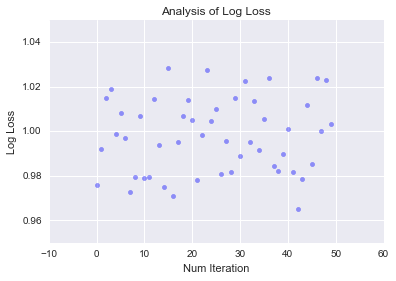

In [78]:
plt.scatter(np.arange(run), errors, color='b', alpha=0.4)
plt.xlabel('Num Iteration')
plt.ylabel('Log Loss')
plt.title('Analysis of Log Loss');

## Correlation among features

In [133]:
def get_correlation_scores(df, start_idx, end_idx):
    if start_idx is None or end_idx is None:
        raise ValueError('Both start and end index is required')
    
    if end_idx < start_idx:
        raise ValueError('End index must be greater than start index')
    
    correlation_map = {}
    
    for i in range(start_idx, end_idx):
        for j in range(start_idx + 1, end_idx):
            if i != j:
                key_pair = (train.columns[i], train.columns[j])
                if (key_pair not in correlation_map) and (key_pair[::-1] not in correlation_map):
                    pearson_score = abs(np.corrcoef(train[train.columns[i]], train[train.columns[j]])[0][1])
                    correlation_map[key_pair] = pearson_score 
                
    return correlation_map

In [156]:
correlation_map = get_correlation_scores(train, 300, 600)

In [157]:
{k: v for k, v in correlation_map.iteritems() if v > 0.9}

{('D309', 'D310'): 0.9078376283231856,
 ('D332', 'D382'): 0.91043175990132386,
 ('D342', 'D435'): 0.91593538876824365,
 ('D399', 'D567'): 0.93682324525487615,
 ('D454', 'D587'): 0.90504985425983575,
 ('D503', 'D581'): 0.90071584154933226,
 ('D565', 'D566'): 0.90347826134135367,
 ('D566', 'D567'): 0.91309419811881309}

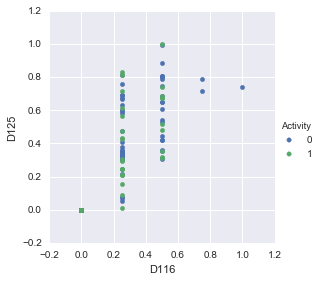

In [153]:
sns.FacetGrid(train, hue='Activity', size=4)\
    .map(plt.scatter, 'D116', 'D125')\
    .add_legend();